<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Feature_1  5000 non-null   int64
 1   Feature_2  5000 non-null   int64
dtypes: int64(2)
memory usage: 78.3 KB
None
Index(['Feature_1', 'Feature_2'], dtype='object')


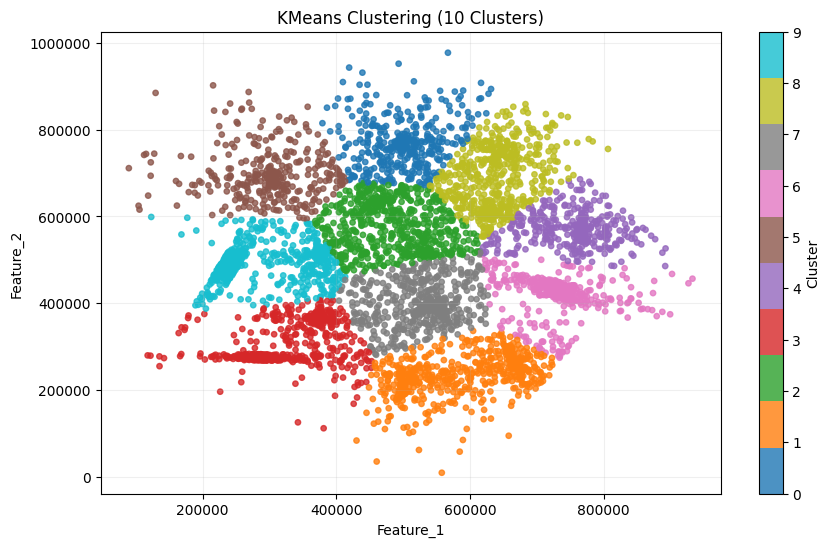

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the CSV file using ';' as separator, assign column names as file has no header row
df = pd.read_csv("2dclusters.csv", sep=';', header=None, names=["Feature_1", "Feature_2"])

# # Get basic information about data
# print(df.info())

# Prepare features (X)
X = df.copy()

# Scale features using StandardScaler (returns a NumPy array)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize KMeans with 4 clusters and fit the model on the scaled data
model = KMeans(n_clusters=10)
model.fit(X_scaled)

# Add the cluster labels assigned by KMeans as a new "Group" column in the DataFrame
df["Group"] = model.labels_

# Plot to visualize the clusters with individual colors
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df["Feature_1"], df["Feature_2"], c=df["Group"], s=15, alpha=0.8, cmap="tab10")
plt.title("KMeans Clustering (10 Clusters)")
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.colorbar(scatter, label="Cluster")
plt.grid(True, alpha=0.2)
plt.ticklabel_format(style='plain', axis='y')
plt.show()